In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [215]:
df = pd.read_csv("Mandi_Prices.csv")

In [216]:
df.head()


,"Min,Max,Modal Price from Uttar Pradesh,Agra[Potato] from 01-Jan-2020To31-Dec-2020 (Total-1827) (Total-1827)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
1,306,Agra,Achnera,Potato,Desi,FAQ,1300,1400,1350,01-Jan-20
2,1139,Agra,Fatehpur Sikri,Potato,Local,FAQ,1400,1520,1455,01-Jan-20
3,1326,Agra,Jagnair,Potato,Desi,FAQ,1250,1350,1300,01-Jan-20
4,1472,Agra,Jarar,Potato,Desi,FAQ,1200,1300,1250,01-Jan-20


In [217]:
df.columns = ['Sl no','District_Name','Market_Name','Commodity','Variety','Grade','Min_Price','Max_Price','Modal_Price','Price_Date']


In [218]:
df.head()

,Sl no,District_Name,Market_Name,Commodity,Variety,Grade,Min_Price,Max_Price,Modal_Price,Price_Date
0,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
1,306,Agra,Achnera,Potato,Desi,FAQ,1300,1400,1350,01-Jan-20
2,1139,Agra,Fatehpur Sikri,Potato,Local,FAQ,1400,1520,1455,01-Jan-20
3,1326,Agra,Jagnair,Potato,Desi,FAQ,1250,1350,1300,01-Jan-20
4,1472,Agra,Jarar,Potato,Desi,FAQ,1200,1300,1250,01-Jan-20


In [219]:
new_df = df.drop(['Grade','Sl no','District_Name','Commodity'], axis=1)

In [220]:
new_df = new_df.iloc[1: , :]

In [221]:
new_df.reset_index()

,index,Market_Name,Variety,Min_Price,Max_Price,Modal_Price,Price_Date
0,1,Achnera,Desi,1300,1400,1350,01-Jan-20
1,2,Fatehpur Sikri,Local,1400,1520,1455,01-Jan-20
2,3,Jagnair,Desi,1250,1350,1300,01-Jan-20
3,4,Jarar,Desi,1200,1300,1250,01-Jan-20
4,5,Khairagarh,Desi,1200,1300,1250,01-Jan-20
...,...,...,...,...,...,...,...
1822,1823,Agra,Desi,800,1100,960,31-Dec-20
1823,1824,Fatehabad,Desi,700,800,750,31-Dec-20
1824,1825,Fatehpur Sikri,Local,900,1100,1015,31-Dec-20
1825,1826,Jagnair,Desi,750,850,800,31-Dec-20


In [222]:
import sweetviz as sv

my_report = sv.analyze(new_df)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [223]:
new_df['Market_Name'].value_counts()

Achnera           306
Fatehpur Sikri    290
Agra              285
Fatehabad         258
Jagnair           187
Khairagarh        187
Samsabad          168
Jarar             146
Name: Market_Name, dtype: int64

In [224]:
for x in new_df.columns:
    if(pd.isnull([x])):
        print(x, ": Null")
    else:
        print(x,": is Not Null")

Market_Name : is Not Null
Variety : is Not Null
Min_Price : is Not Null
Max_Price : is Not Null
Modal_Price : is Not Null
Price_Date : is Not Null


In [225]:
new_df.describe()

,Market_Name,Variety,Min_Price,Max_Price,Modal_Price,Price_Date
count,1827,1827,1827,1827,1827,1827
unique,8,4,153,165,295,365
top,Achnera,Desi,1200,1300,1200,15-Jun-20
freq,306,1367,149,147,111,8


In [226]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 1 to 1827
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Market_Name  1827 non-null   object
 1   Variety      1827 non-null   object
 2   Min_Price    1827 non-null   object
 3   Max_Price    1827 non-null   object
 4   Modal_Price  1827 non-null   object
 5   Price_Date   1827 non-null   object
dtypes: object(6)
memory usage: 85.8+ KB


In [227]:
new_df.Price_Date.head()

1    01-Jan-20
2    01-Jan-20
3    01-Jan-20
4    01-Jan-20
5    01-Jan-20
Name: Price_Date, dtype: object

In [ ]:
for i in range(1,len(new_df['Price_Date'])):
    new_df['Price_Date'][i] = datetime.datetime.strptime(new_df['Price_Date'][i],'%d-%b-%y').strftime('%Y-%m-%d')
    new_df['Price_Date'][i] = pd.to_datetime(new_df['Price_Date'][i])
    
    

In [229]:
k = new_df['Price_Date'][1]
print(k)

2020-01-01 00:00:00


In [250]:
new_df.tail()

,Market_Name,Variety,Min_Price,Max_Price,Modal_Price,Price_Date
1823,Agra,Desi,1100,1100,960,2020-12-31
1824,Fatehabad,Desi,800,800,750,2020-12-31
1825,Fatehpur Sikri,Local,1100,1100,1015,2020-12-31
1826,Jagnair,Desi,850,850,800,2020-12-31
1827,Khairagarh,Desi,1200,1200,1150,2020-12-31


In [231]:
type(new_df['Price_Date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [247]:
new_df.dtypes

Market_Name            object
Variety                object
Min_Price               int64
Max_Price               int64
Modal_Price             int64
Price_Date     datetime64[ns]
dtype: object

In [237]:
new_df['Modal_Price'] = pd.to_numeric(new_df['Modal_Price'])

In [239]:
new_df['Price_Date'] = pd.to_datetime(new_df['Price_Date'])

In [241]:
new_df['Min_Price'] = pd.to_numeric(new_df['Min_Price'])

In [243]:
new_df['Max_Price'] = pd.to_numeric(new_df['Max_Price'])

<AxesSubplot:xlabel='Price_Date'>

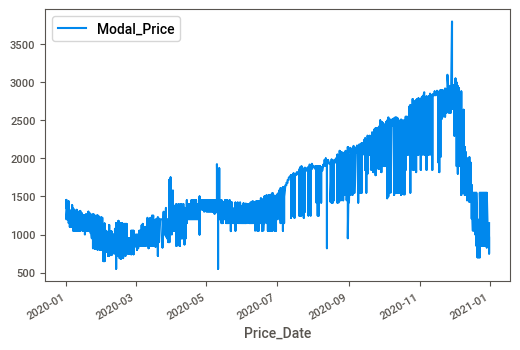

In [249]:
new_df.plot(x ='Price_Date', y='Modal_Price')

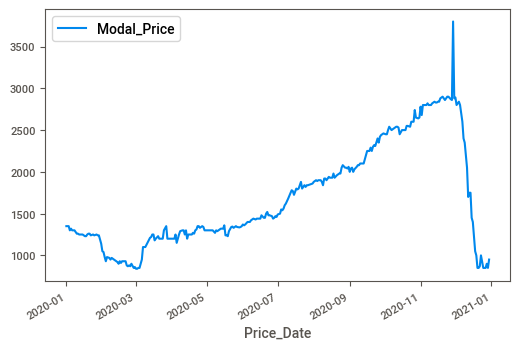

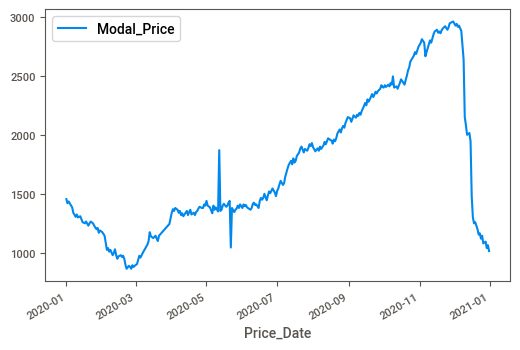

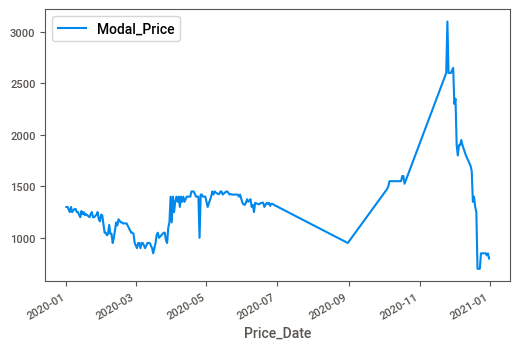

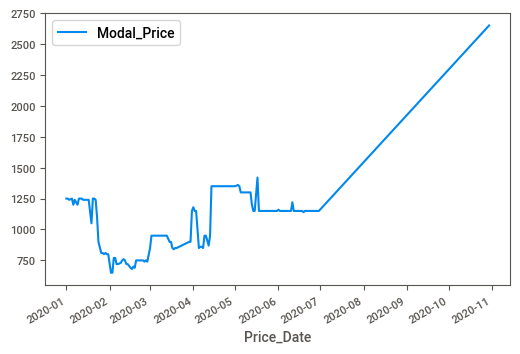

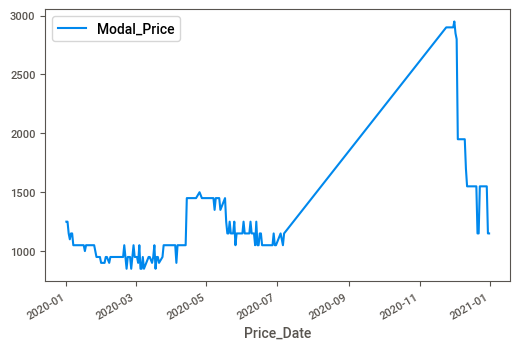

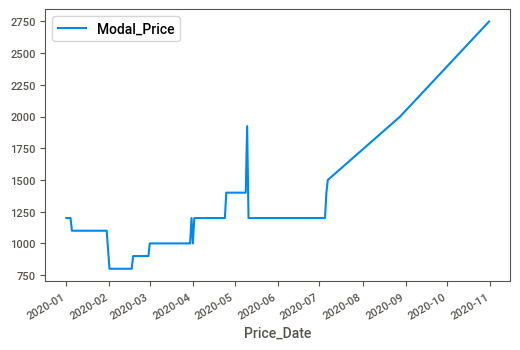

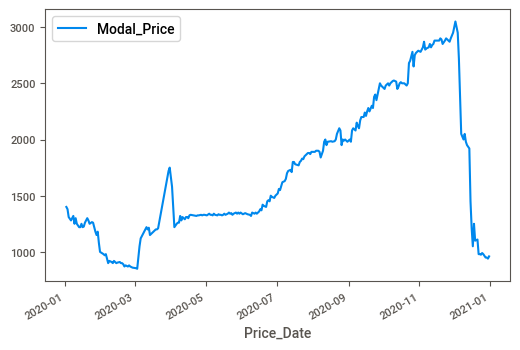

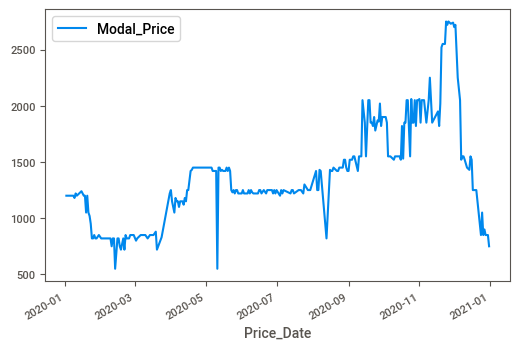

In [274]:
for X in new_df['Market_Name'].unique():
    X = new_df[new_df['Market_Name'] == X]
    X.plot(x = 'Price_Date', y='Modal_Price')
    
    

In [275]:
#I will use modal price for the prediction of prices in the Mandi

In [320]:
agra = new_df[new_df['Market_Name'] == 'Agra']
df1 = agra.reset_index()['Modal_Price']

In [321]:
df1

0      1400
1      1380
2      1310
3      1280
4      1300
       ... 
280     980
281     950
282     950
283     940
284     960
Name: Modal_Price, Length: 285, dtype: int64

<AxesSubplot:>

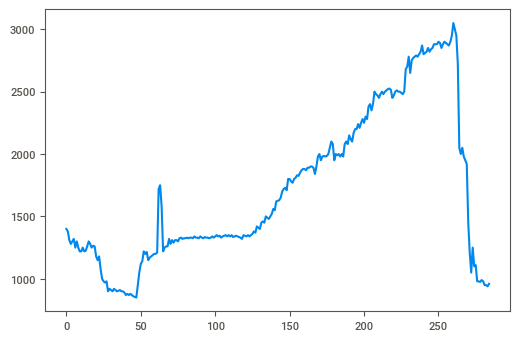

In [322]:
df1.plot(x = 'Price_Date', y = 'Modal_Price')

In [323]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [324]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [325]:
training_size,test_size

(185, 100)

In [326]:
train_data

array([[0.25      ],
       [0.24090909],
       [0.20909091],
       [0.19545455],
       [0.20454545],
       [0.21363636],
       [0.18181818],
       [0.20454545],
       [0.18181818],
       [0.16818182],
       [0.16818182],
       [0.18181818],
       [0.16818182],
       [0.17045455],
       [0.18636364],
       [0.20454545],
       [0.19545455],
       [0.18181818],
       [0.18863636],
       [0.18636364],
       [0.15      ],
       [0.13636364],
       [0.15      ],
       [0.10454545],
       [0.06818182],
       [0.05909091],
       [0.05454545],
       [0.05909091],
       [0.02272727],
       [0.03181818],
       [0.02727273],
       [0.02272727],
       [0.03181818],
       [0.02727273],
       [0.02272727],
       [0.025     ],
       [0.02727273],
       [0.02272727],
       [0.02272727],
       [0.01818182],
       [0.00909091],
       [0.01363636],
       [0.00909091],
       [0.01363636],
       [0.00909091],
       [0.00454545],
       [0.00227273],
       [0.   

In [373]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----49  50
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [374]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 50
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [375]:
print(X_train.shape), print(y_train.shape)

(134, 50)
(134,)


(None, None)

In [376]:
print(X_test.shape), print(ytest.shape)

(49, 50)
(49,)


(None, None)

In [377]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [378]:

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [380]:

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [381]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_10 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [382]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)


Epoch 1/100
5/5 [==============================] - 2s 315ms/step - loss: 0.0567 - val_loss: 0.1018
Epoch 2/100
5/5 [==============================] - 0s 47ms/step - loss: 0.0139 - val_loss: 0.0963
Epoch 3/100
5/5 [==============================] - 0s 40ms/step - loss: 0.0053 - val_loss: 0.1048
Epoch 4/100
5/5 [==============================] - 0s 37ms/step - loss: 0.0080 - val_loss: 0.0838
Epoch 5/100
5/5 [==============================] - 0s 38ms/step - loss: 0.0040 - val_loss: 0.0932
Epoch 6/100
5/5 [==============================] - 0s 38ms/step - loss: 0.0038 - val_loss: 0.0810
Epoch 7/100
5/5 [==============================] - 0s 38ms/step - loss: 0.0038 - val_loss: 0.0790
Epoch 8/100
5/5 [==============================] - 0s 38ms/step - loss: 0.0031 - val_loss: 0.0939
Epoch 9/100
5/5 [==============================] - 0s 37ms/step - loss: 0.0034 - val_loss: 0.0981
Epoch 10/100
5/5 [==============================] - 0s 37ms/step - loss: 0.0028 - val_loss: 0.0822
Epoch 11/100
5/5 [

In [383]:
import tensorflow as tf

In [384]:
tf.__version__

'2.3.0'

In [385]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [413]:
test_predict

array([[2964.0925 ],
       [3023.3433 ],
       [3081.3213 ],
       [3136.152  ],
       [3187.0686 ],
       [3235.368  ],
       [3276.7666 ],
       [3310.716  ],
       [3337.3545 ],
       [3358.3018 ],
       [3372.8586 ],
       [3382.5034 ],
       [3388.445  ],
       [3393.0205 ],
       [3396.8923 ],
       [3400.4446 ],
       [3404.8293 ],
       [3409.4983 ],
       [3412.367  ],
       [3414.2363 ],
       [3416.2346 ],
       [3418.1191 ],
       [3419.2156 ],
       [3418.8794 ],
       [3418.6296 ],
       [3421.0723 ],
       [3431.313  ],
       [3447.2043 ],
       [3465.2153 ],
       [3472.7256 ],
       [3435.4185 ],
       [3348.1677 ],
       [3217.8066 ],
       [3050.6743 ],
       [2856.4607 ],
       [2645.3438 ],
       [2408.2266 ],
       [2144.5098 ],
       [1859.9012 ],
       [1576.6539 ],
       [1307.1747 ],
       [1066.6565 ],
       [ 862.48737],
       [ 699.9694 ],
       [ 579.7787 ],
       [ 500.63843],
       [ 459.98544],
       [ 454.

In [386]:

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [387]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1551.8585828287335

In [388]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

2908.692904319993

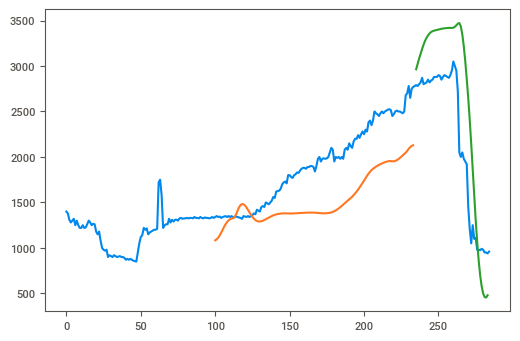

In [412]:

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [392]:

len(test_data)

100

In [393]:
x_input=test_data[:].reshape(1,-1)
x_input.shape

(1, 100)

In [394]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [395]:
temp_input

[0.5227272727272727,
 0.5136363636363637,
 0.5590909090909091,
 0.5681818181818182,
 0.5590909090909091,
 0.5909090909090909,
 0.5772727272727273,
 0.5681818181818182,
 0.6,
 0.6136363636363636,
 0.6136363636363636,
 0.6318181818181817,
 0.6181818181818183,
 0.6363636363636364,
 0.65,
 0.6363636363636364,
 0.6590909090909091,
 0.65,
 0.6954545454545454,
 0.7045454545454545,
 0.6818181818181818,
 0.7045454545454545,
 0.7500000000000001,
 0.7409090909090909,
 0.7363636363636364,
 0.7272727272727272,
 0.7409090909090909,
 0.7500000000000001,
 0.7409090909090909,
 0.7500000000000001,
 0.7545454545454545,
 0.7590909090909091,
 0.7613636363636364,
 0.7568181818181817,
 0.7272727272727272,
 0.7363636363636364,
 0.7500000000000001,
 0.7545454545454545,
 0.7500000000000001,
 0.7500000000000001,
 0.7454545454545455,
 0.7409090909090909,
 0.7500000000000001,
 0.8318181818181819,
 0.8409090909090909,
 0.8772727272727273,
 0.8181818181818182,
 0.8636363636363636,
 0.8727272727272727,
 0.87727272727

In [396]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[-0.11330727]
101
1 day input [ 0.51363636  0.55909091  0.56818182  0.55909091  0.59090909  0.57727273
  0.56818182  0.6         0.61363636  0.61363636  0.63181818  0.61818182
  0.63636364  0.65        0.63636364  0.65909091  0.65        0.69545455
  0.70454545  0.68181818  0.70454545  0.75        0.74090909  0.73636364
  0.72727273  0.74090909  0.75        0.74090909  0.75        0.75454545
  0.75909091  0.76136364  0.75681818  0.72727273  0.73636364  0.75
  0.75454545  0.75        0.75        0.74545455  0.74090909  0.75
  0.83181818  0.84090909  0.87727273  0.81818182  0.86363636  0.87272727
  0.87727273  0.88181818  0.87727273  0.88636364  0.89545455  0.91818182
  0.88636364  0.89090909  0.89545455  0.90909091  0.89545455  0.90454545
  0.90909091  0.92272727  0.92272727  0.92272727  0.93181818  0.92727273
  0.90909091  0.92272727  0.93181818  0.92727273  0.92272727  0.91818182
  0.93181818  0.95454545  1.          0.97727273  0.95454545  0.85
  0.54545455  0.52272727  0.54545455  0

In [398]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [399]:
import matplotlib.pyplot as plt

In [400]:
len(df1)

285

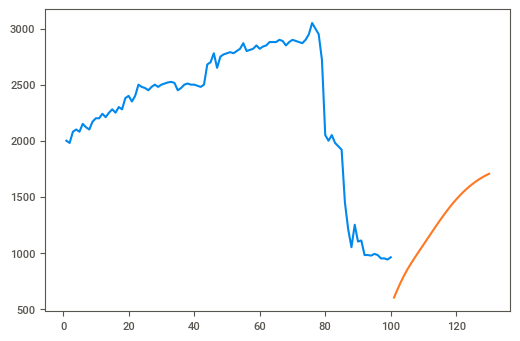

In [406]:

plt.plot(day_new,scaler.inverse_transform(df1[185:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

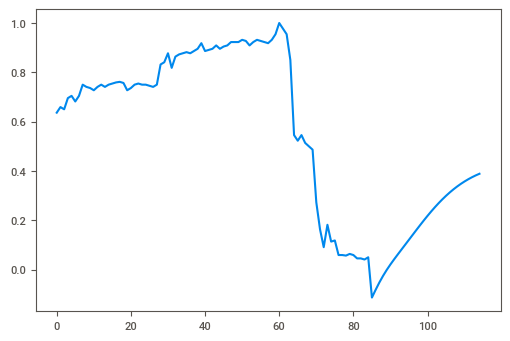

In [407]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[200:])

In [408]:
df3=scaler.inverse_transform(df3).tolist()

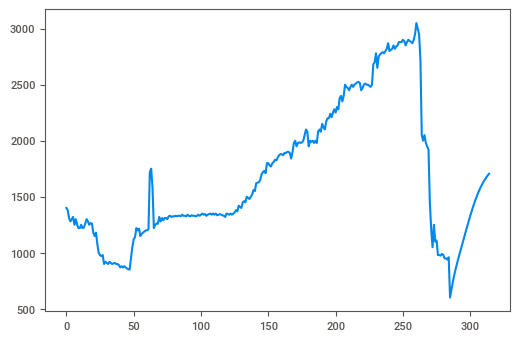

In [409]:
plt.plot(df3)